## EDA Visualizations
- Since our project is focused on factors that impact churn, let's first look at our `churn` feature. It is clearly defined as either a 1 or a 0, split almost halfway with no duplicate values. Since we have balanced data, we don't need to worry about needing oversampling. 
- Now let's look at some other features' relationships with `churn`. Just looking at `income` does not seem to have a direct impact on the churn rate, as the distributions are almost exactly the same. 
- We next look at some demographic information as well as personal information about the customer. So far, no considerable difference between churn and no churn. 
- We also looked specifically at customer care calls to see if customer service issues / product issues could be a strong factor in churn, but seemingly it is not. Also, change in minutes from the previous three months does not have a large impact on the churn distributions. 
- The age of the equipment is the first feature to show a slight difference, with the distribution of customers who left having slightly older equipment. 
- When looking at the handset price, it looks like when the price is under ~$50, the churn rate is higher. Yet as the price gets higher, the churn rate is lower. 
- We create a heatmap to better understand the correlation of the numeric features. The full heatmap is a bit hard to read, so we will split the numeric variables into groups for easier reading.
- The heatmaps show us that there are some features with correlation of 1, meaning they have a perfect positive linear relationship. Keeping both in the dataset would prove to be redundant, so we choose to remove one. From this logic, we drop the following from the data: 
    - `ovrrev_Mean`
    - `cc_mou_Mean`
    - `mou_opkd_Mean`
    - `attempt_Mean`
    - `complete_Mean`
    - `mou_cdat_Mean`
    - `adjqty`
    - `adjmou`
    - `adjrev`
- We have other features with 0.98 or 0.99 correlation that we can also choose to remove: 
    - `vceovr_Mean`
    - `comp_vce_Mean`
    - `inonemin_Mean`
    - `ccrndmou_Mean`

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
vis_df = pd.read_csv('../data/processed/cleaned_data.csv')

In [3]:
vis_df

rev_Mean    mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  ovrrev_Mean  \
0      23.997500  219.250000    22.500000  0.247500     0.000000      0.00000   
1      57.492500  482.750000    37.425000  0.247500    22.750000      9.10000   
2      16.990000   10.250000    16.990000  0.000000     0.000000      0.00000   
3      38.000000    7.500000    38.000000  0.000000     0.000000      0.00000   
4      55.230000  570.500000    71.980000  0.000000     0.000000      0.00000   
...          ...         ...          ...       ...          ...          ...   
99995  58.719985  513.559937    46.179136  0.888828    41.072247     13.55956   
99996  58.719985  513.559937    46.179136  0.888828    41.072247     13.55956   
99997  58.719985  513.559937    46.179136  0.888828    41.072247     13.55956   
99998  58.719985  513.559937    46.179136  0.888828    41.072247     13.55956   
99999  58.719985  513.559937    46.179136  0.888828    41.072247     13.55956   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  ethnic  kid0_2  \
0         0.000000     0.000000   0.000000 -157.250000  ...       N       U   
1         9.100000     0.000000   0.000000  532.250000  ...       Z       U   
2         0.000000     0.000000   0.000000   -4.250000  ...       N       U   
3         0.000000     0.000000   0.000000   -1.500000  ...       U       Y   
4         0.000000     0.000000   0.000000   38.500000  ...       I       U   
...            ...          ...        ...         ...  ...     ...     ...   
99995    13.295062     0.261318   1.286405  -13.933818  ...       S       U   
99996    13.295062     0.261318   1.286405  -13.933818  ...       N       U   
99997    13.295062     0.261318   1.286405  -13.933818  ...       U       Y   
99998    13.295062     0.261318   1.286405  -13.933818  ...       S       U   
99999    13.295062     0.261318   1.286405  -13.933818  ...       H       U   

       kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  \
0           U        U         U         U         Y    361.0      1000001   
1           U        U         U         U         Y    240.0      1000002   
2           Y        U         U         U         Y   1504.0      1000003   
3           U        U         U         U         Y   1812.0      1000004   
4           U        U         U         U         Y    434.0      1000005   
...       ...      ...       ...       ...       ...      ...          ...   
99995       U        U         Y         U         Y    773.0      1099996   
99996       U        Y         Y         Y         Y    835.0      1099997   
99997       Y        U         U         U         N    433.0      1099998   
99998       U        U         U         U         N     75.0      1099999   
99999       U        U         U         U         N      5.0      1100000   

       num_ppl_household  
0                      1  
1                      1  
2                      3  
3                      5  
4                      1  
...                  ...  
99995                  6  
99996                  6  
99997                  3  
99998                  2  
99999                  2  

[100000 rows x 99 columns]

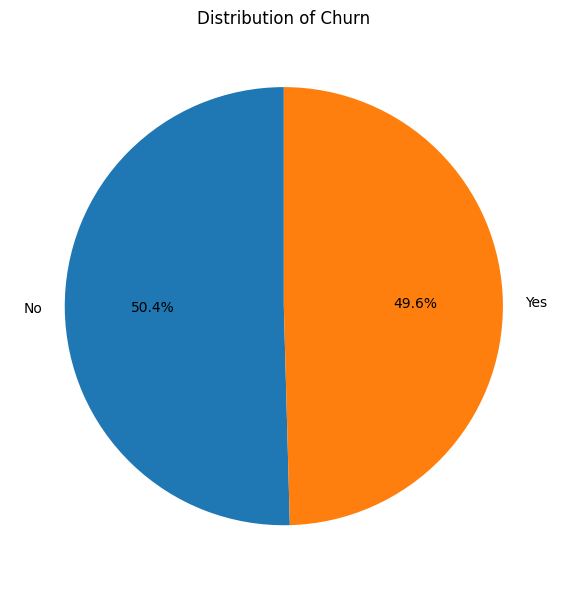

In [4]:
# viewing churn

plt.figure(figsize=(6, 6))

plt.pie(vis_df['churn'].value_counts(), labels=['No', 'Yes'], startangle=90, autopct='%1.1f%%')
plt.title(f'Distribution of Churn')

plt.tight_layout()
plt.show()

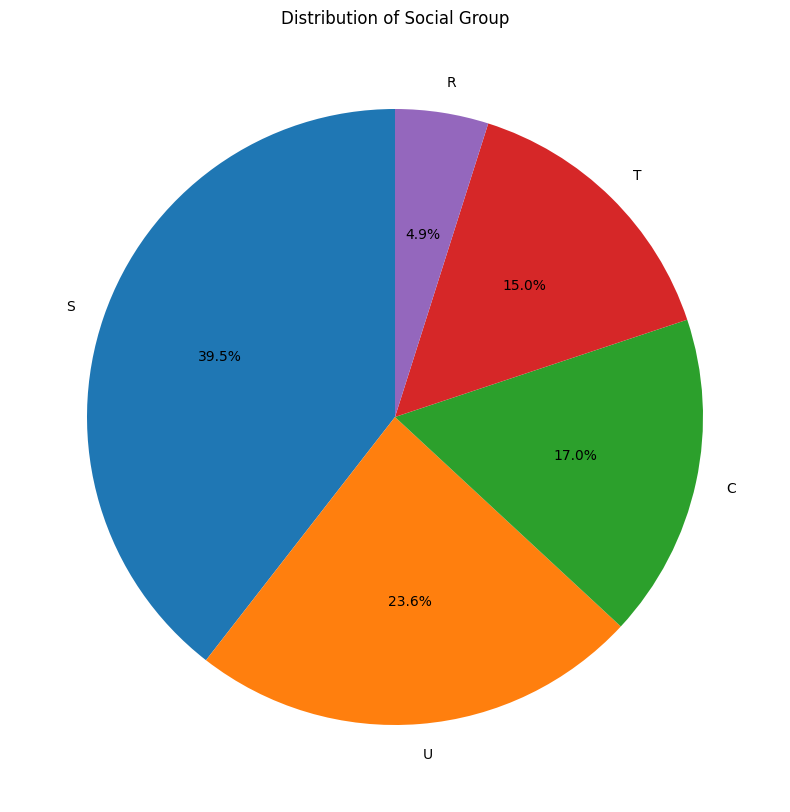

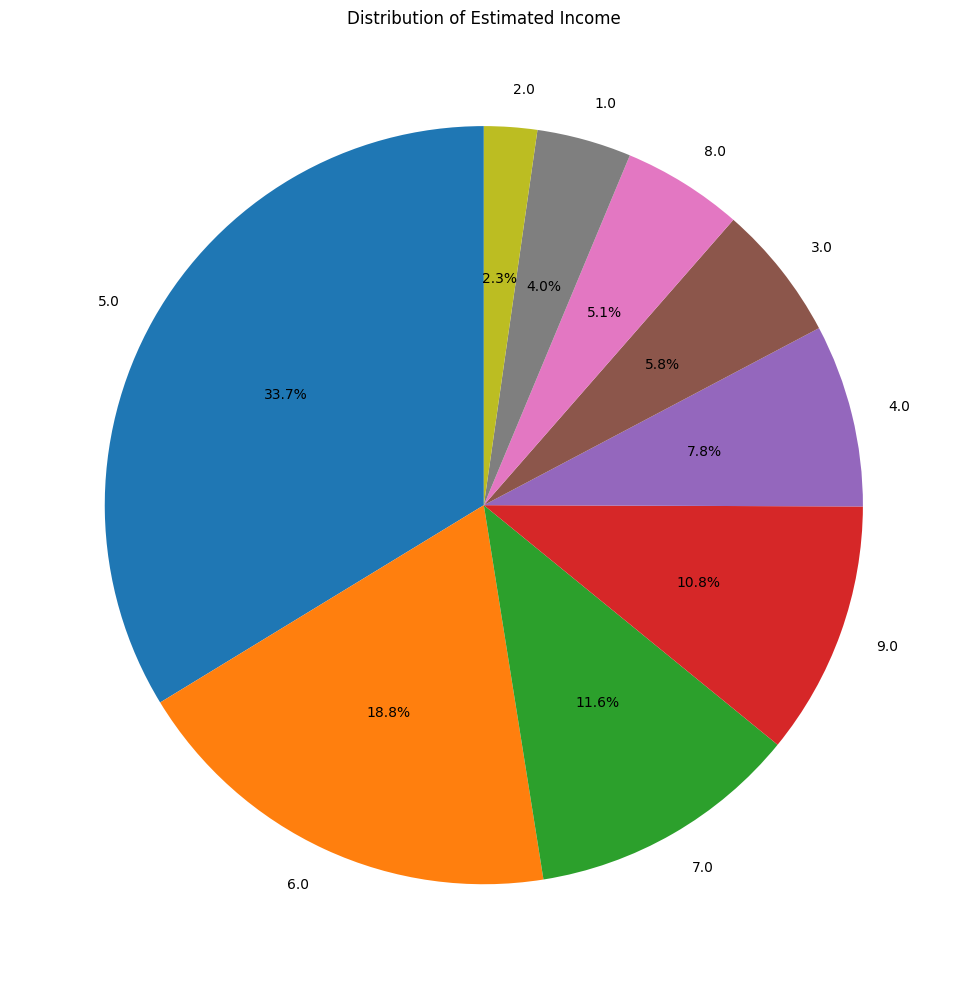

In [8]:
# general visualizations - not necessarily in relation to churn

feature_names_map = {
    'prizm_social_one': 'Social Group',
    'income': 'Estimated Income'
}

for i, col in enumerate(feature_names_map.keys()):
    feature_counts = vis_df[col].value_counts()
    plt.figure(figsize=(10, 10))
    plt.pie(feature_counts, labels=feature_counts.index, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {feature_names_map.get(col, col)}')

plt.tight_layout()
plt.show()

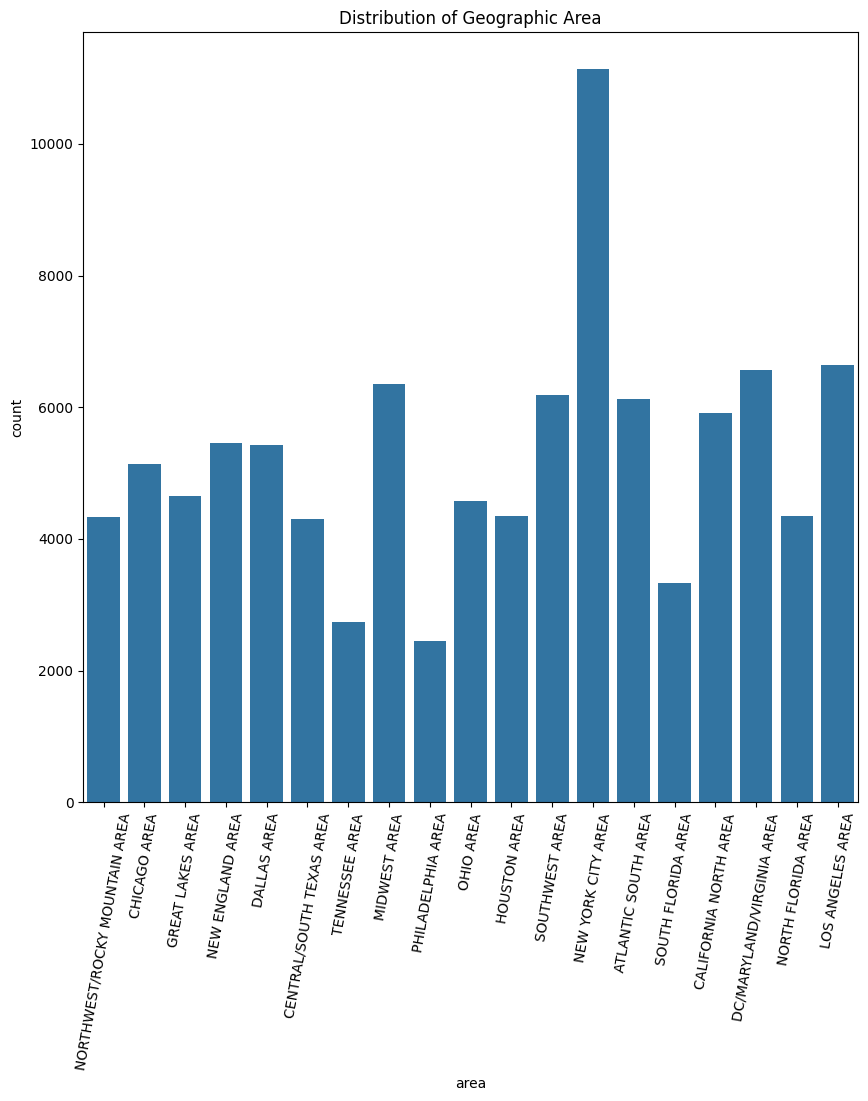

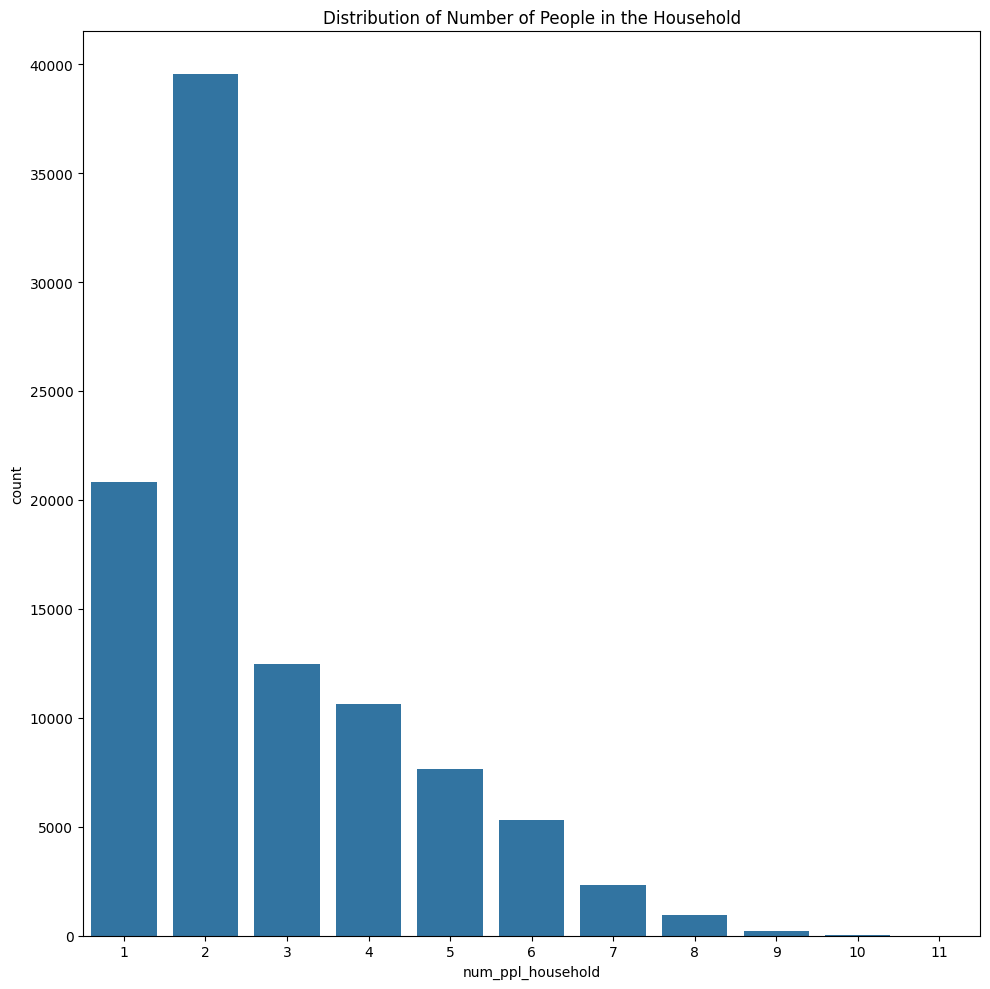

In [13]:
# general visualizations - not necessarily in relation to churn

feature_names_map = {
    'area': 'Geographic Area',
    'num_ppl_household': 'Number of People in the Household',
}

for i, col in enumerate(feature_names_map.keys()):
    plt.figure(figsize=(10, 10))
    sns.countplot(x=col, data=vis_df)
    plt.title(f'Distribution of {feature_names_map.get(col, col)}')
    if col == 'area':
        plt.xticks(rotation=80)

plt.tight_layout()
plt.show()

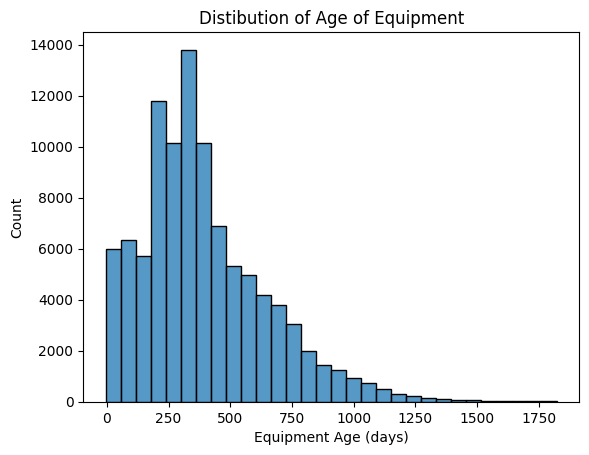

In [45]:
# distribution of age of equipment

sns.histplot(data=vis_df, x='eqpdays', bins=30)
plt.xlabel('Equipment Age (days)')
plt.ylabel('Count')
plt.title('Distibution of Age of Equipment')
plt.show()

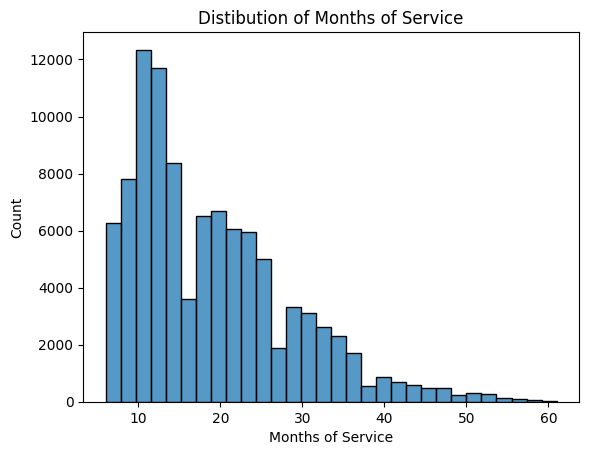

In [44]:
# distribution of months of service

sns.histplot(data=vis_df, x='months', bins=30)
plt.xlabel('Months of Service')
plt.ylabel('Count')
plt.title('Distibution of Months of Service')
plt.show()

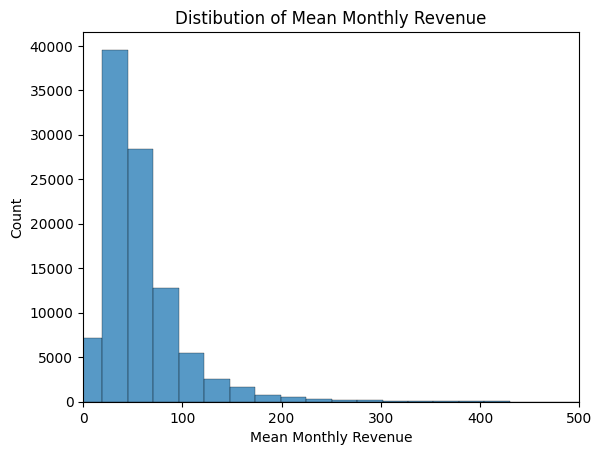

In [42]:
# distribution of revenue mean

sns.histplot(data=vis_df, x='rev_Mean', bins=150)
plt.xlabel('Mean Monthly Revenue')
plt.ylabel('Count')
plt.title('Distibution of Mean Monthly Revenue')
plt.xlim(0, 500)
plt.show()

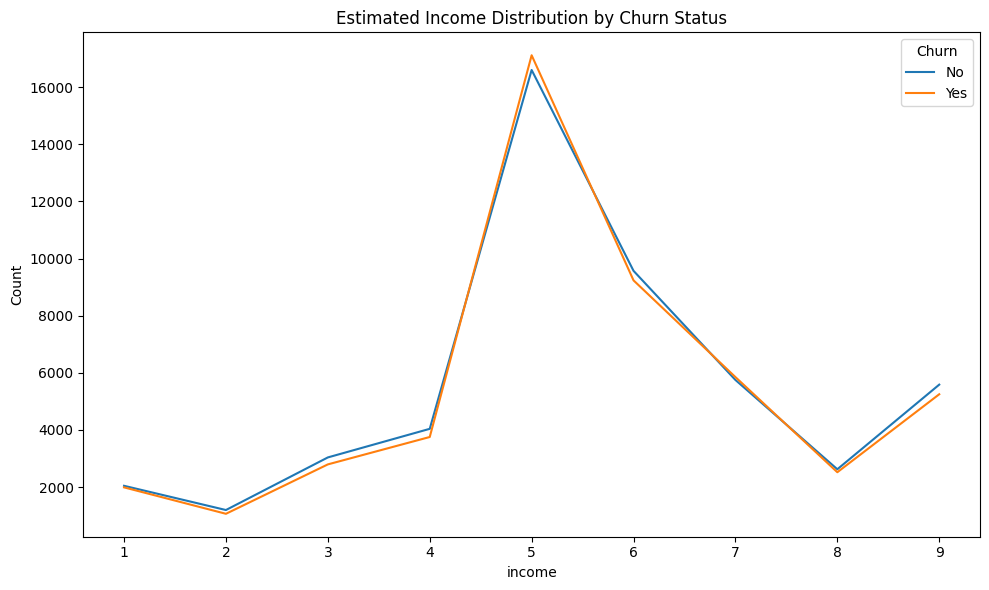

In [15]:
grouped_data = vis_df.groupby(['income', 'churn']).size().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Estimated Income Distribution by Churn Status')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

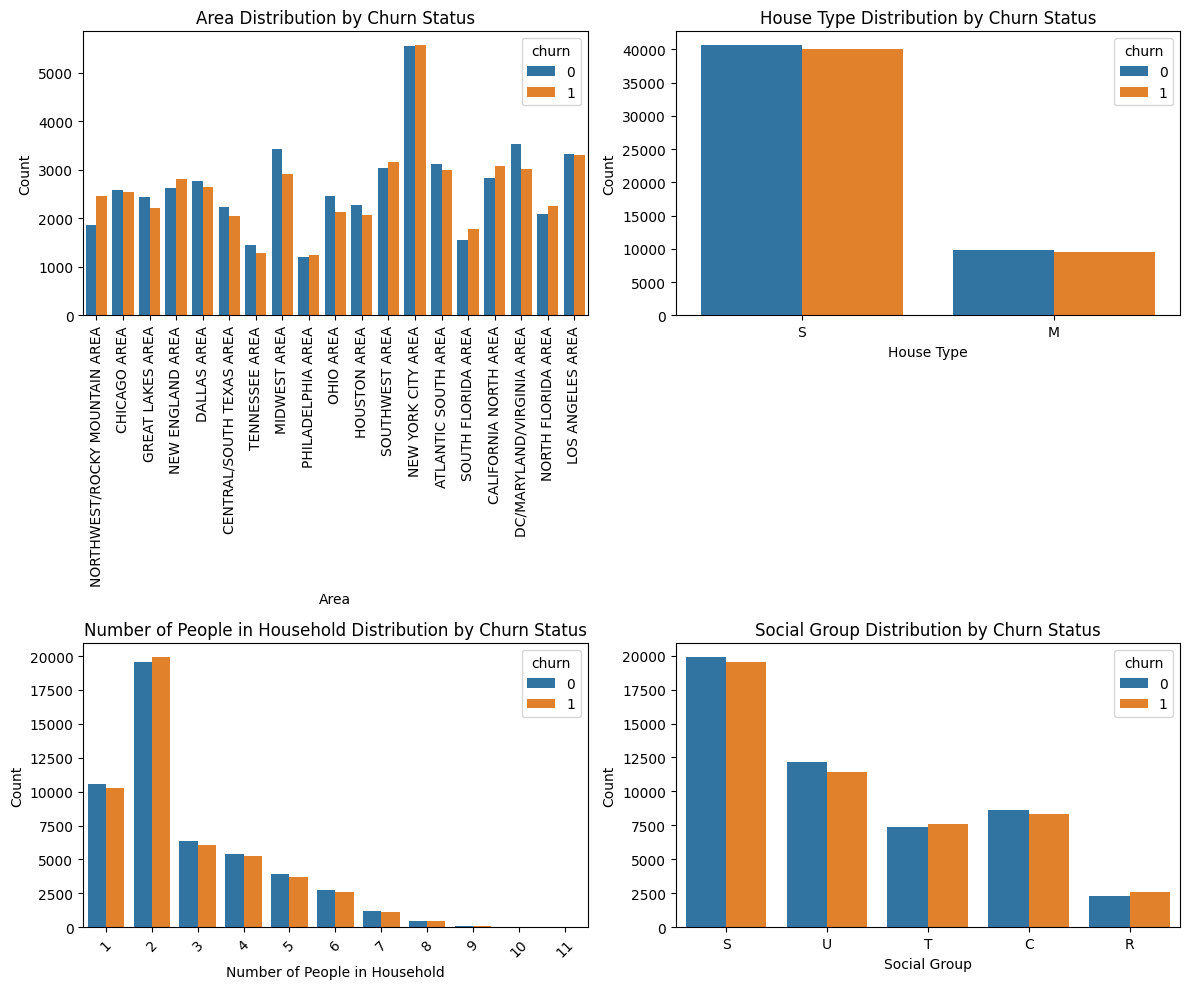

In [16]:
plt.figure(figsize=(12, 10))

# Plot for 'area'
plt.subplot(2, 2, 1)
sns.countplot(x='area', hue='churn', data=vis_df)
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Area Distribution by Churn Status')

# Plot for 'dwlltype'
plt.subplot(2, 2, 2)
sns.countplot(x='dwlltype', hue='churn', data=vis_df)
plt.xlabel('House Type')
plt.ylabel('Count')
plt.title('House Type Distribution by Churn Status')

# Plot for 'num_ppl_household'
plt.subplot(2, 2, 3)
sns.countplot(x='num_ppl_household', hue='churn', data=vis_df)
plt.xlabel('Number of People in Household')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Number of People in Household Distribution by Churn Status')

# Plot for 'social group'
plt.subplot(2, 2, 4)
sns.countplot(x='prizm_social_one', hue='churn', data=vis_df)
plt.xlabel('Social Group')
plt.ylabel('Count')
plt.title('Social Group Distribution by Churn Status')

plt.tight_layout()
plt.show()

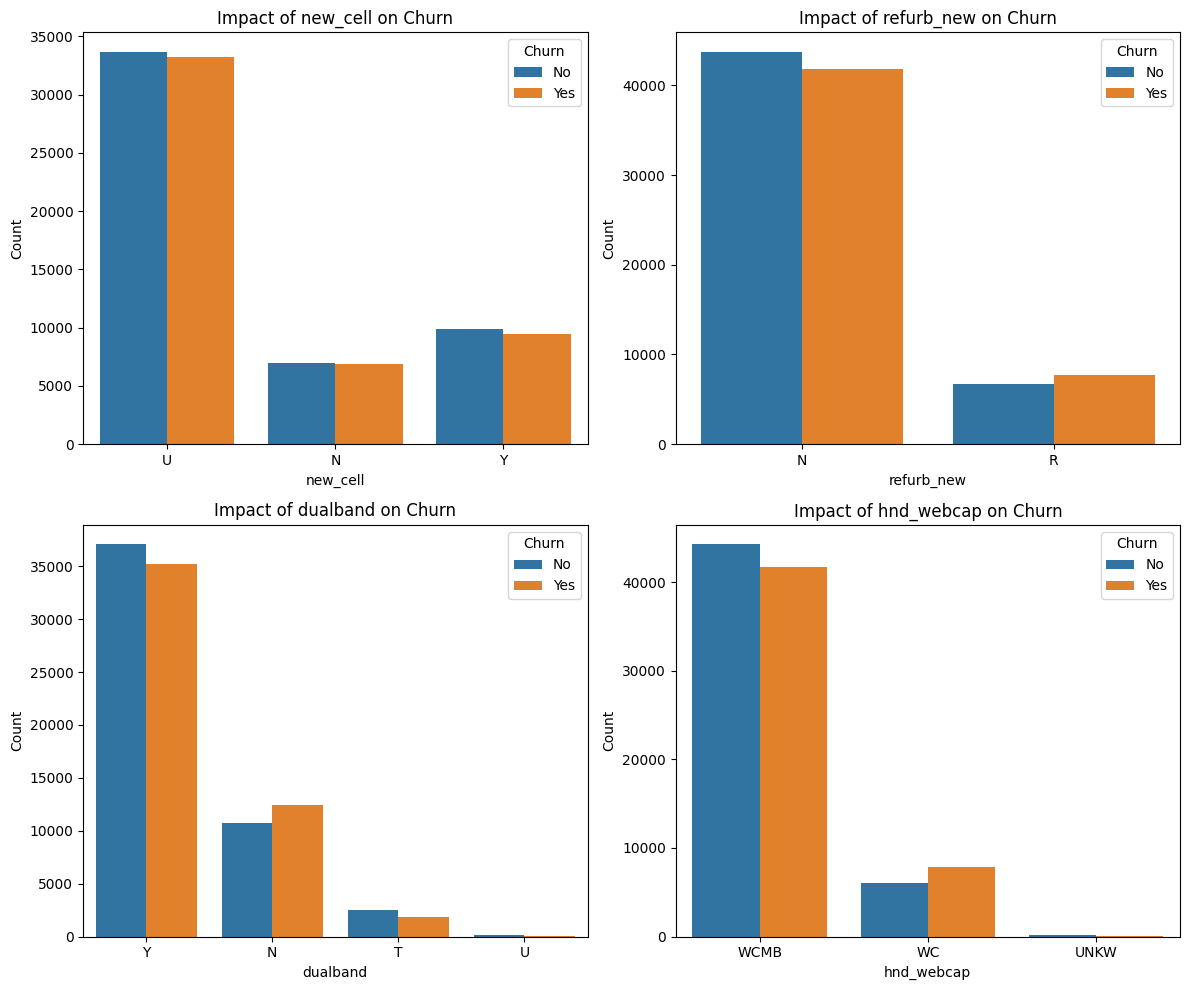

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(['new_cell', 'refurb_new', 'dualband', 'hnd_webcap']):
    sns.countplot(x=col, hue='churn', data=vis_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Count')
    axes[i//2, i%2].set_title(f'Impact of {col} on Churn')
    axes[i//2, i%2].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

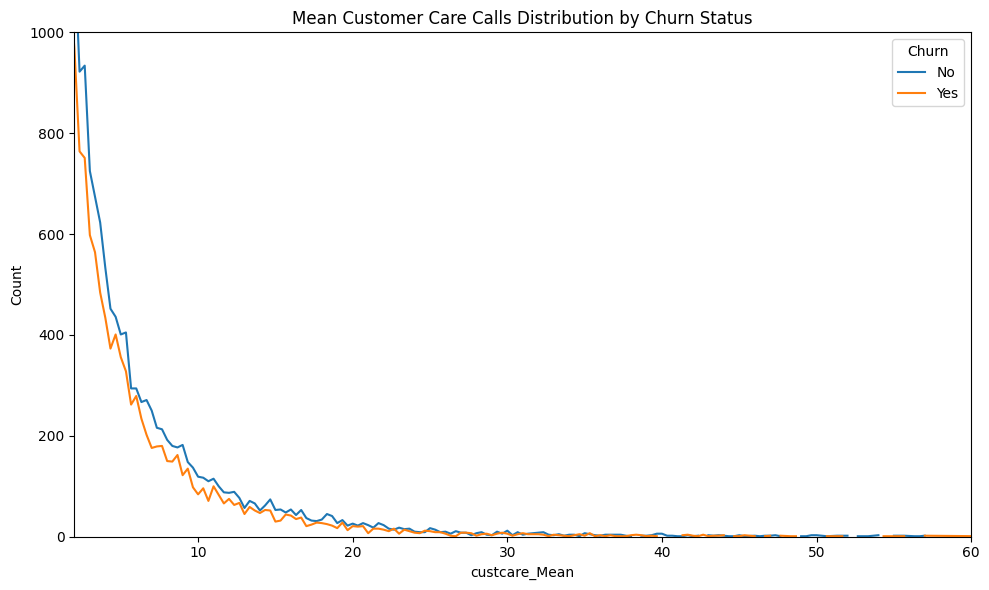

In [18]:
grouped_data = vis_df.groupby(['custcare_Mean', 'churn']).size().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('custcare_Mean')
plt.ylabel('Count')
plt.title('Mean Customer Care Calls Distribution by Churn Status')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.xlim(xmin=2, xmax=60)
plt.ylim(ymin=0, ymax=1000) 

plt.tight_layout()
plt.show()

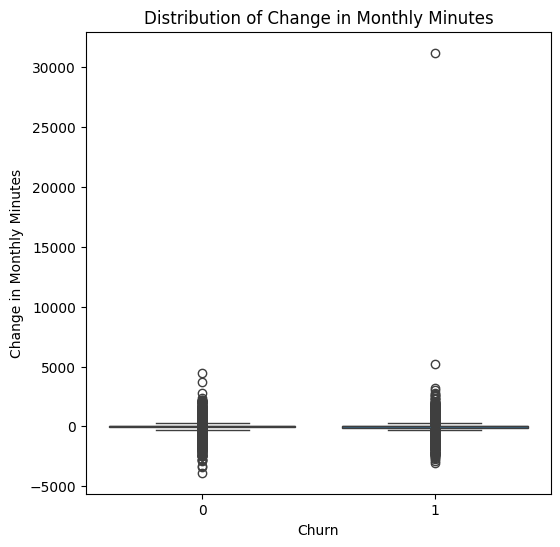

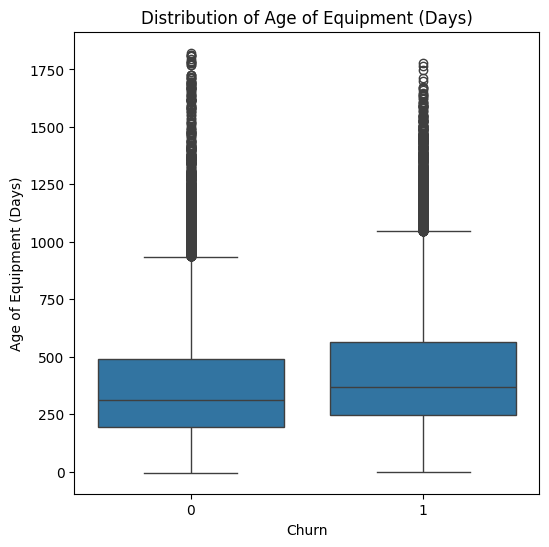

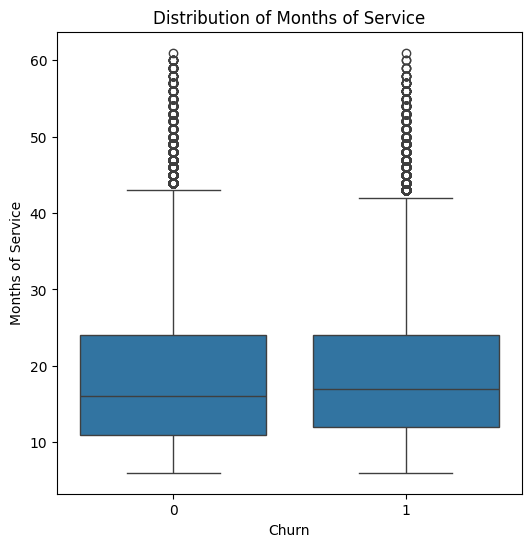

In [22]:
boxplot_map = {'change_mou': 'Change in Monthly Minutes', 
               'eqpdays': 'Age of Equipment (Days)',
               'months': 'Months of Service'}

for i, col in enumerate(boxplot_map.keys()):
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='churn', y=col, data=vis_df)
    plt.xlabel('Churn')
    plt.ylabel(boxplot_map.get(col, col))
    plt.title(f'Distribution of {boxplot_map.get(col, col)}')
    plt.show()


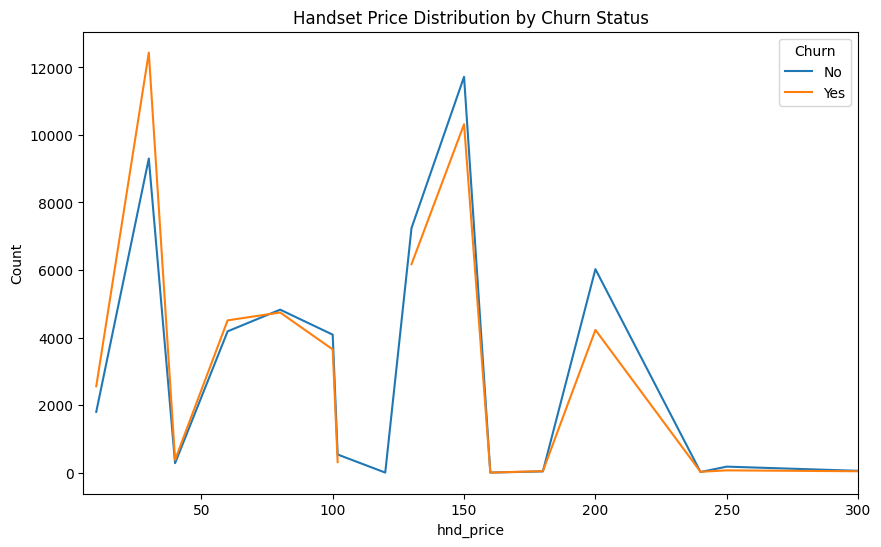

In [23]:
# see how price impacts churn

price_grouped_data = vis_df.groupby(['hnd_price', 'churn']).size().unstack()

price_grouped_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('hnd_price')
plt.ylabel('Count')
plt.title('Handset Price Distribution by Churn Status')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.xlim(xmin=5, xmax=300)

plt.show()

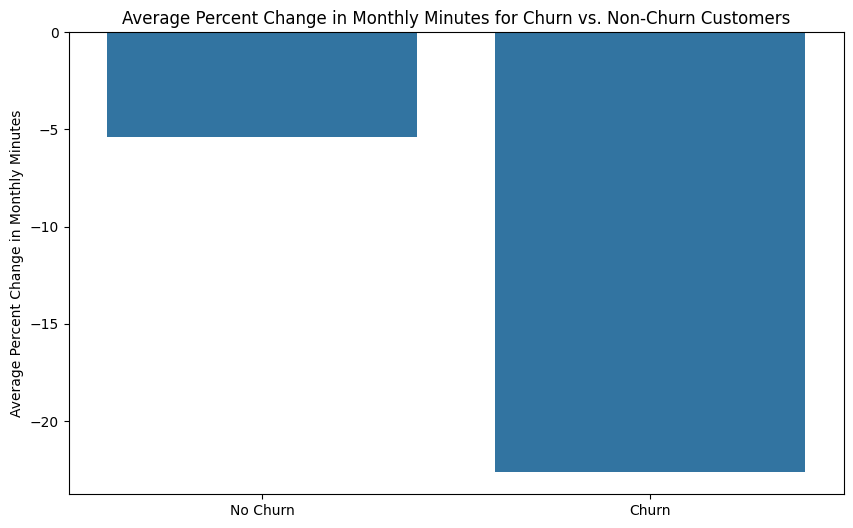

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=vis_df, x='churn', y='change_mou', estimator=np.mean, ci=None)
plt.title('Average Percent Change in Monthly Minutes for Churn vs. Non-Churn Customers')
plt.ylabel('Average Percent Change in Monthly Minutes')
plt.xlabel('')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

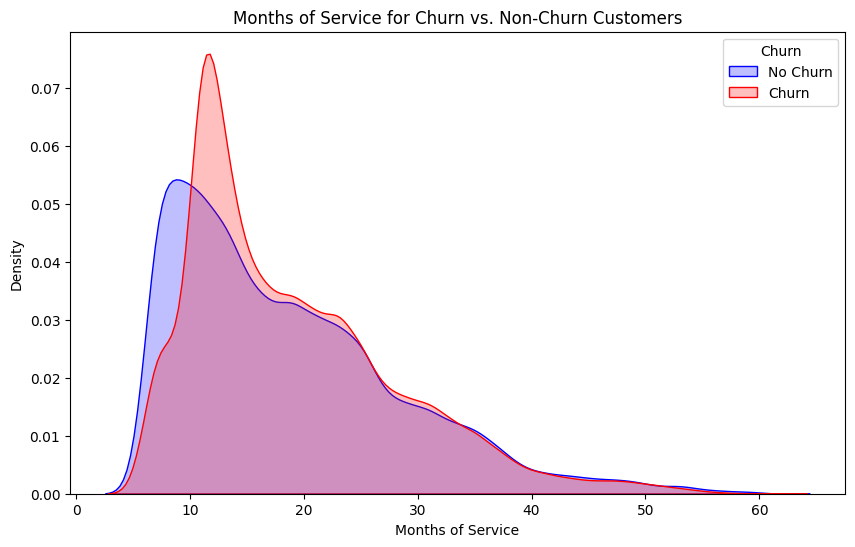

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=vis_df[vis_df['churn'] == 0]['months'], color='blue', label='No Churn', shade=True)
sns.kdeplot(data=vis_df[vis_df['churn'] == 1]['months'], color='red', label='Churn', shade=True)
plt.title('Months of Service for Churn vs. Non-Churn Customers')
plt.xlabel('Months of Service')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

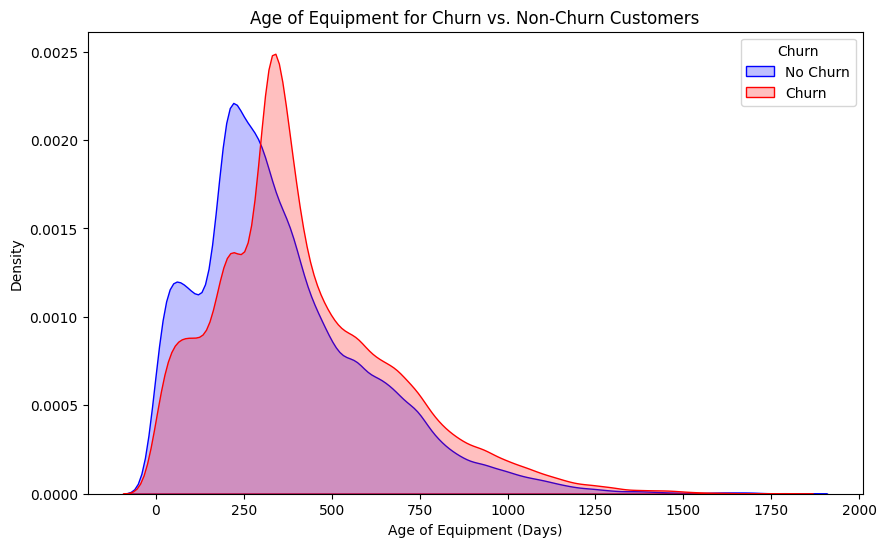

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=vis_df[vis_df['churn'] == 0]['eqpdays'], color='blue', label='No Churn', shade=True)
sns.kdeplot(data=vis_df[vis_df['churn'] == 1]['eqpdays'], color='red', label='Churn', shade=True)
plt.title('Age of Equipment for Churn vs. Non-Churn Customers')
plt.xlabel('Age of Equipment (Days)')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

### Feature Correlation

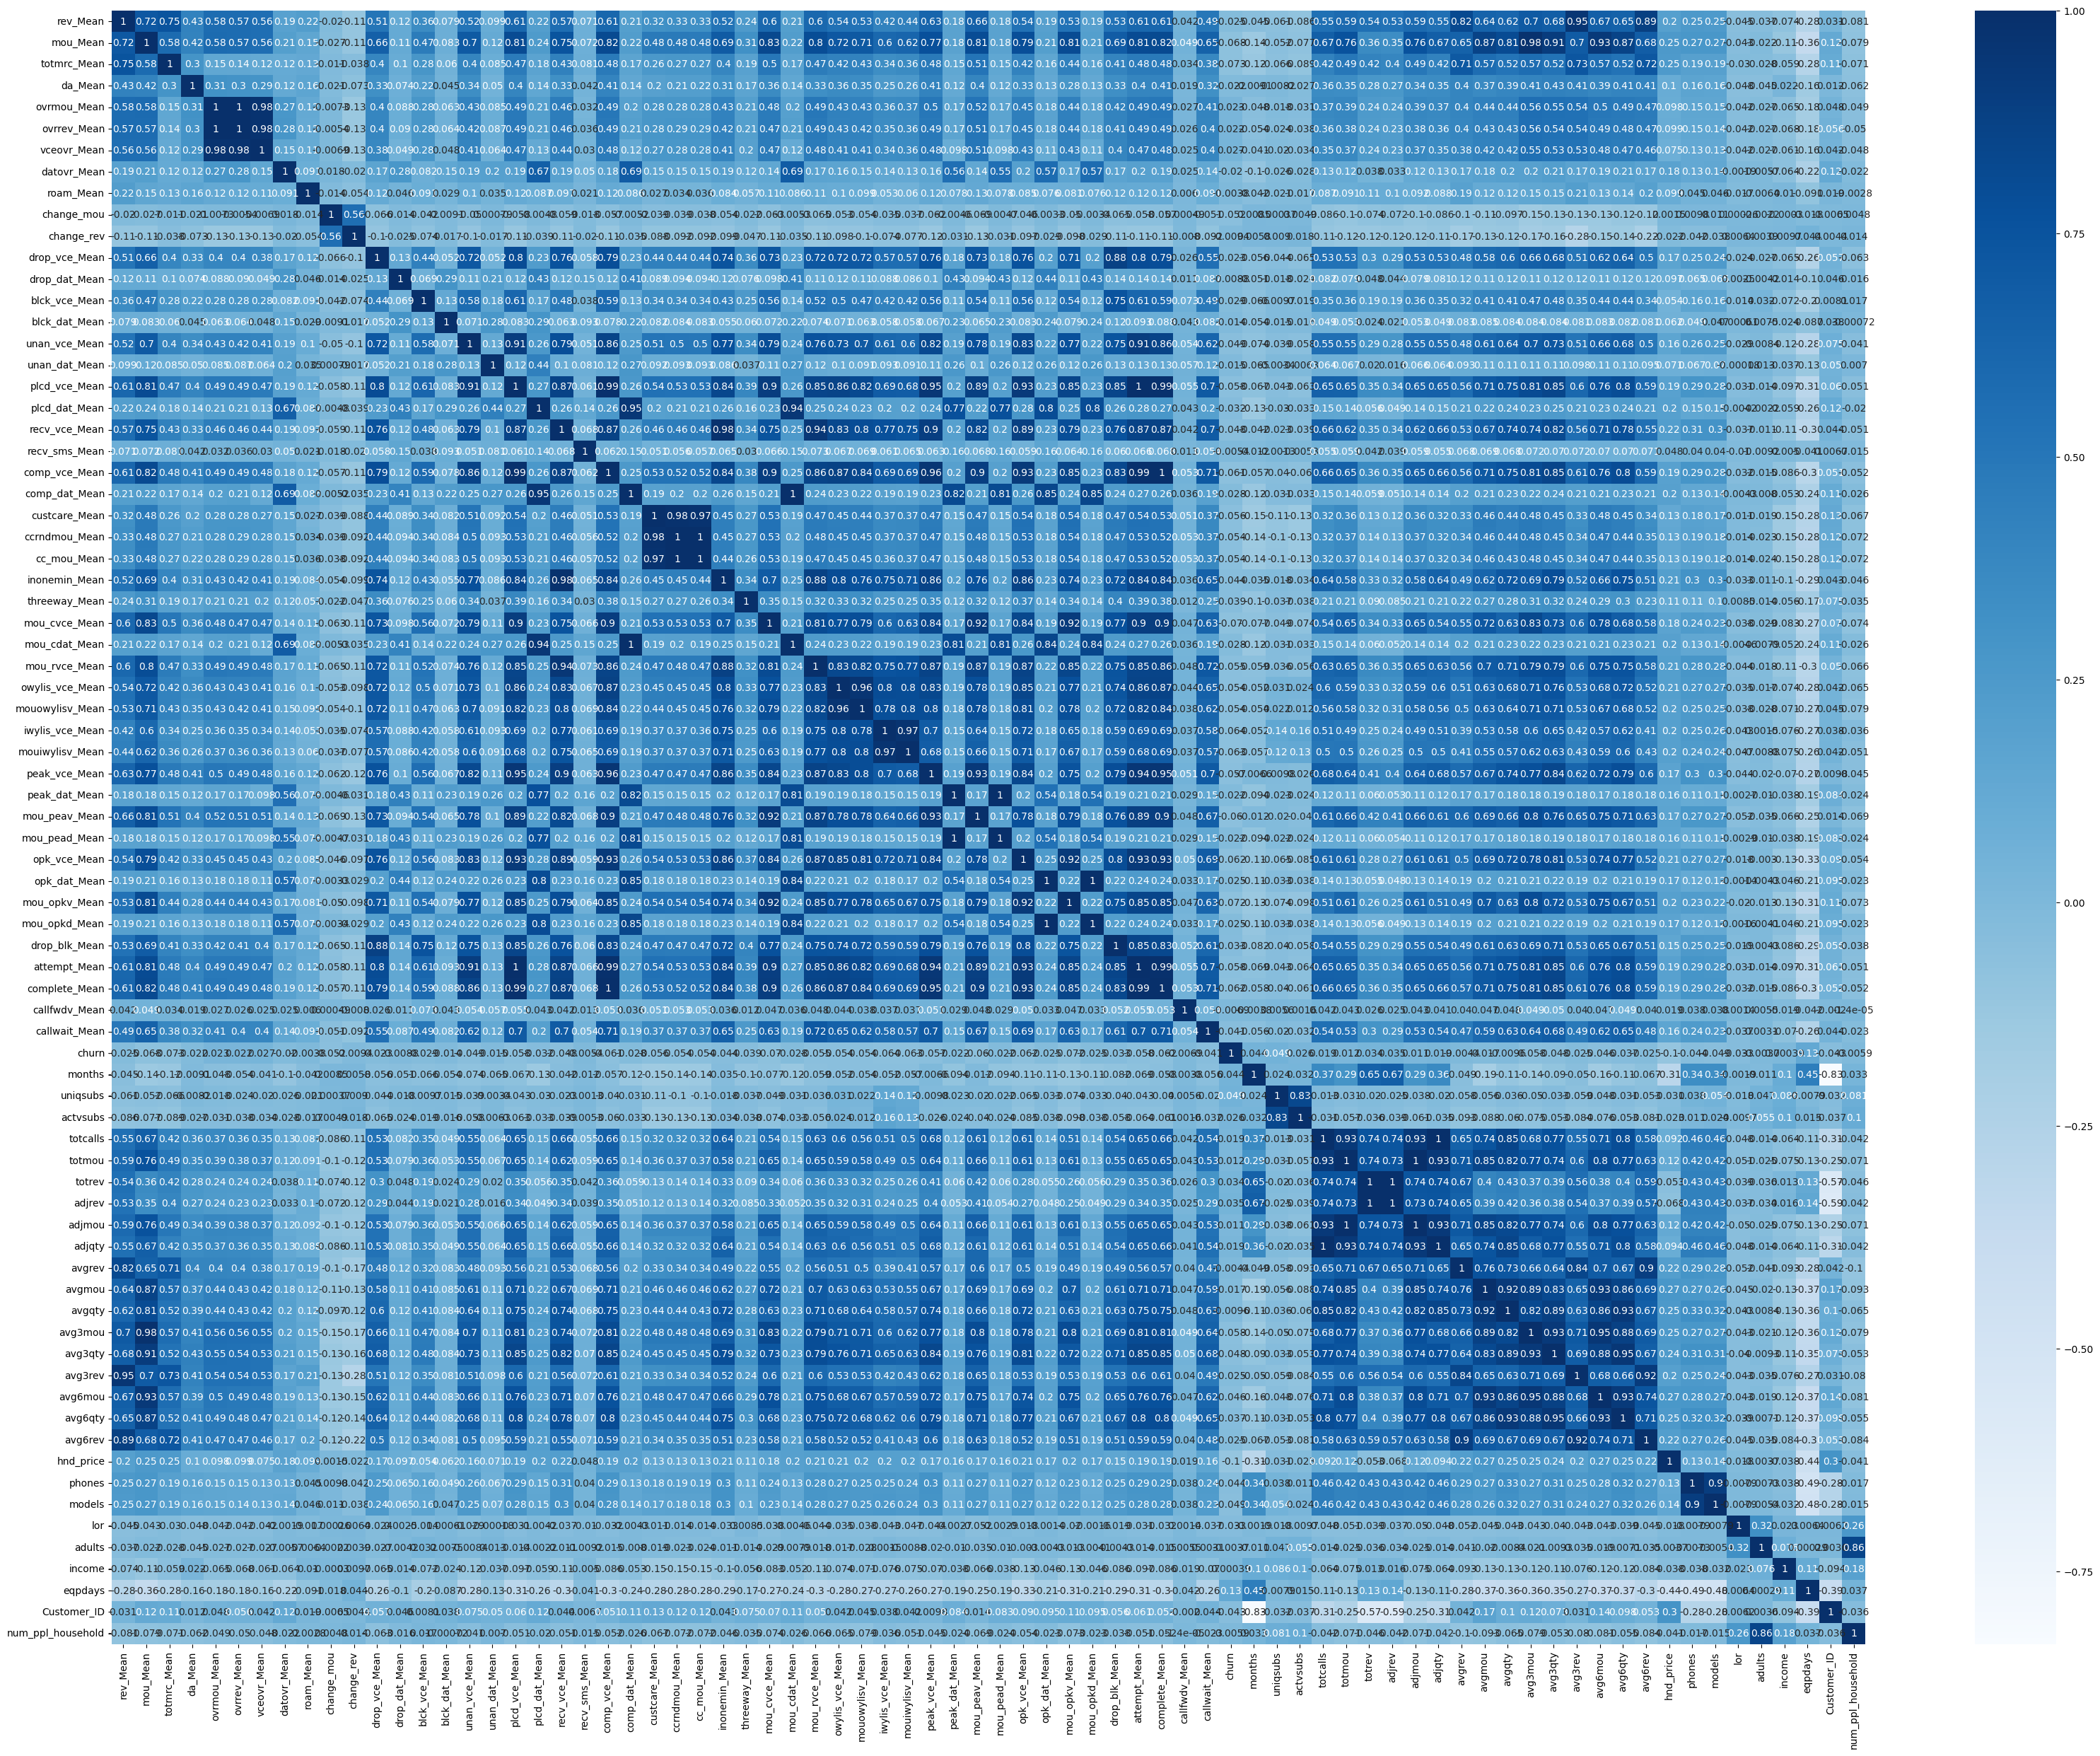

In [24]:
# numeric feature correlation

numeric_cols = [col for col in vis_df.columns if vis_df[col].dtype in ['int64', 'float64']]

numeric_data = vis_df[numeric_cols]
numeric_data_spearman = numeric_data.corr(method='spearman')

plt.figure(figsize=(40, 30))
sns.heatmap(data = numeric_data_spearman, annot=True, cmap=plt.cm.Blues)
plt.show()

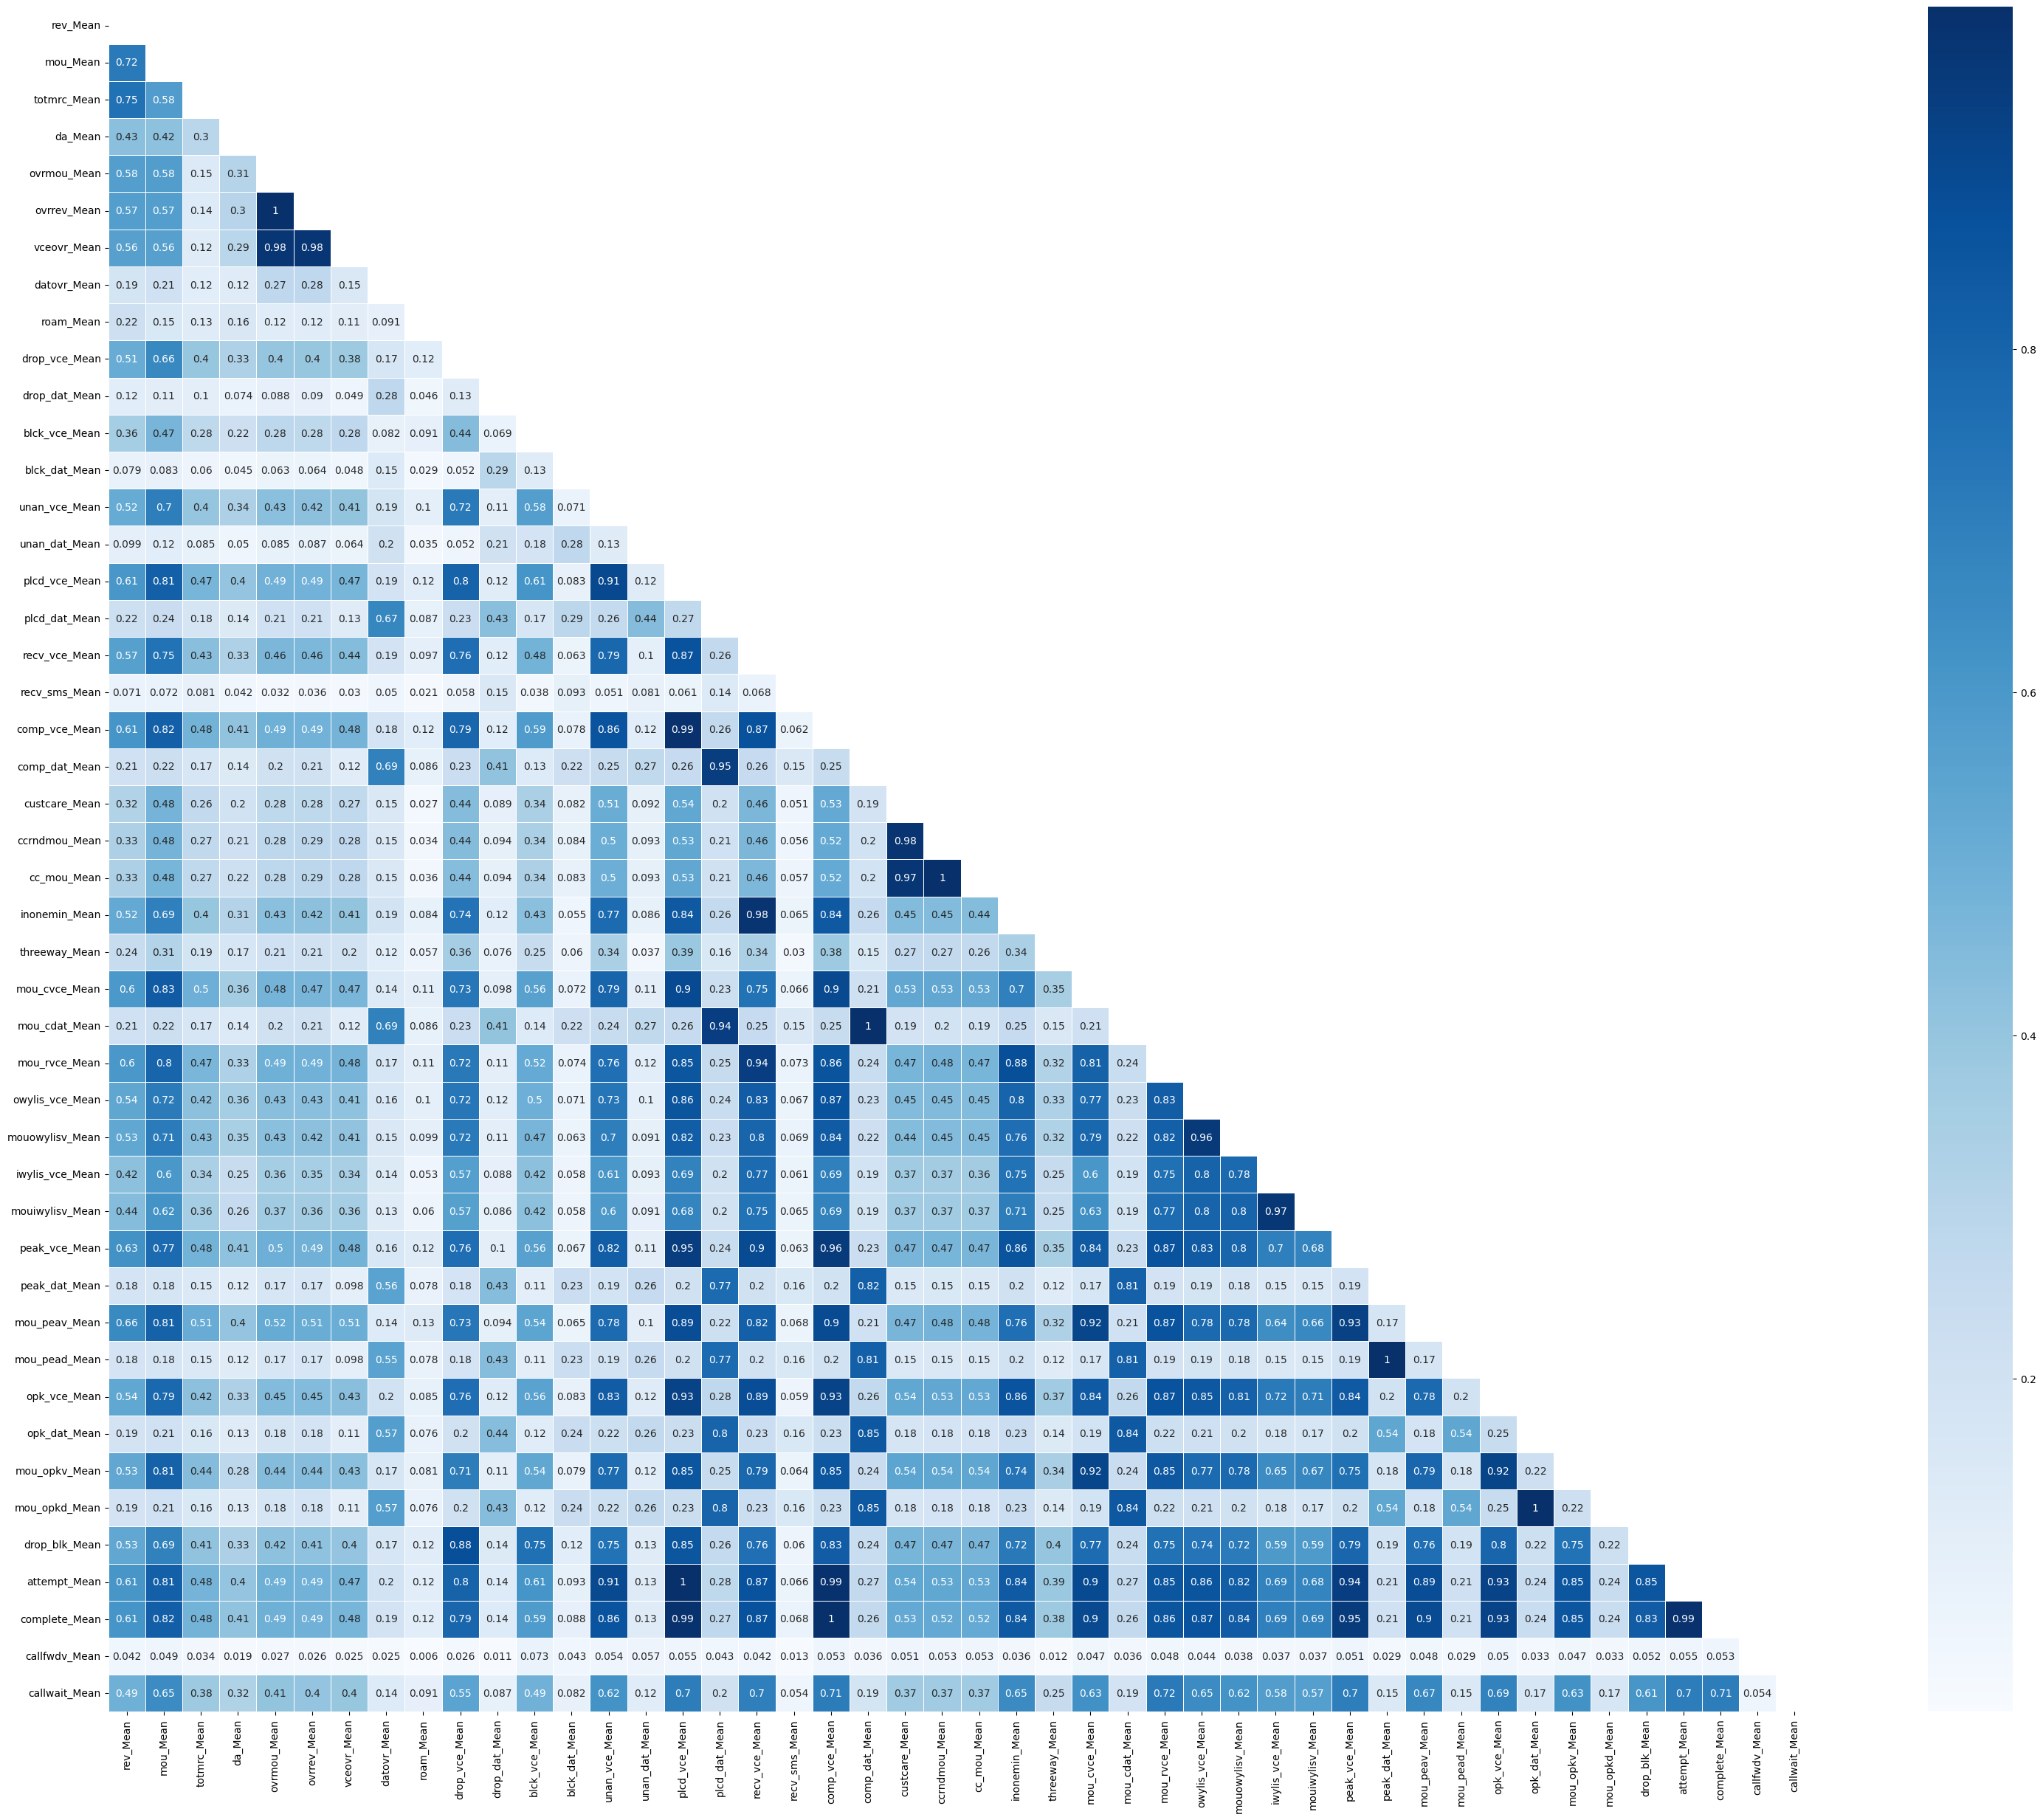

In [34]:
heatmap1 = [element for element in numeric_cols if 'mean' in element.lower()]
heatmap2 = [element for element in numeric_cols if element not in heatmap1]

# heatmap for mean cols

mean_data = vis_df[heatmap1]
mean_data_spearman = mean_data.corr(method='spearman')

mask = np.zeros_like(mean_data_spearman, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(40, 30))
sns.heatmap(data = mean_data_spearman, mask=mask, annot=True, cmap=plt.cm.Blues, square=True, linewidths=0.5)
plt.show()

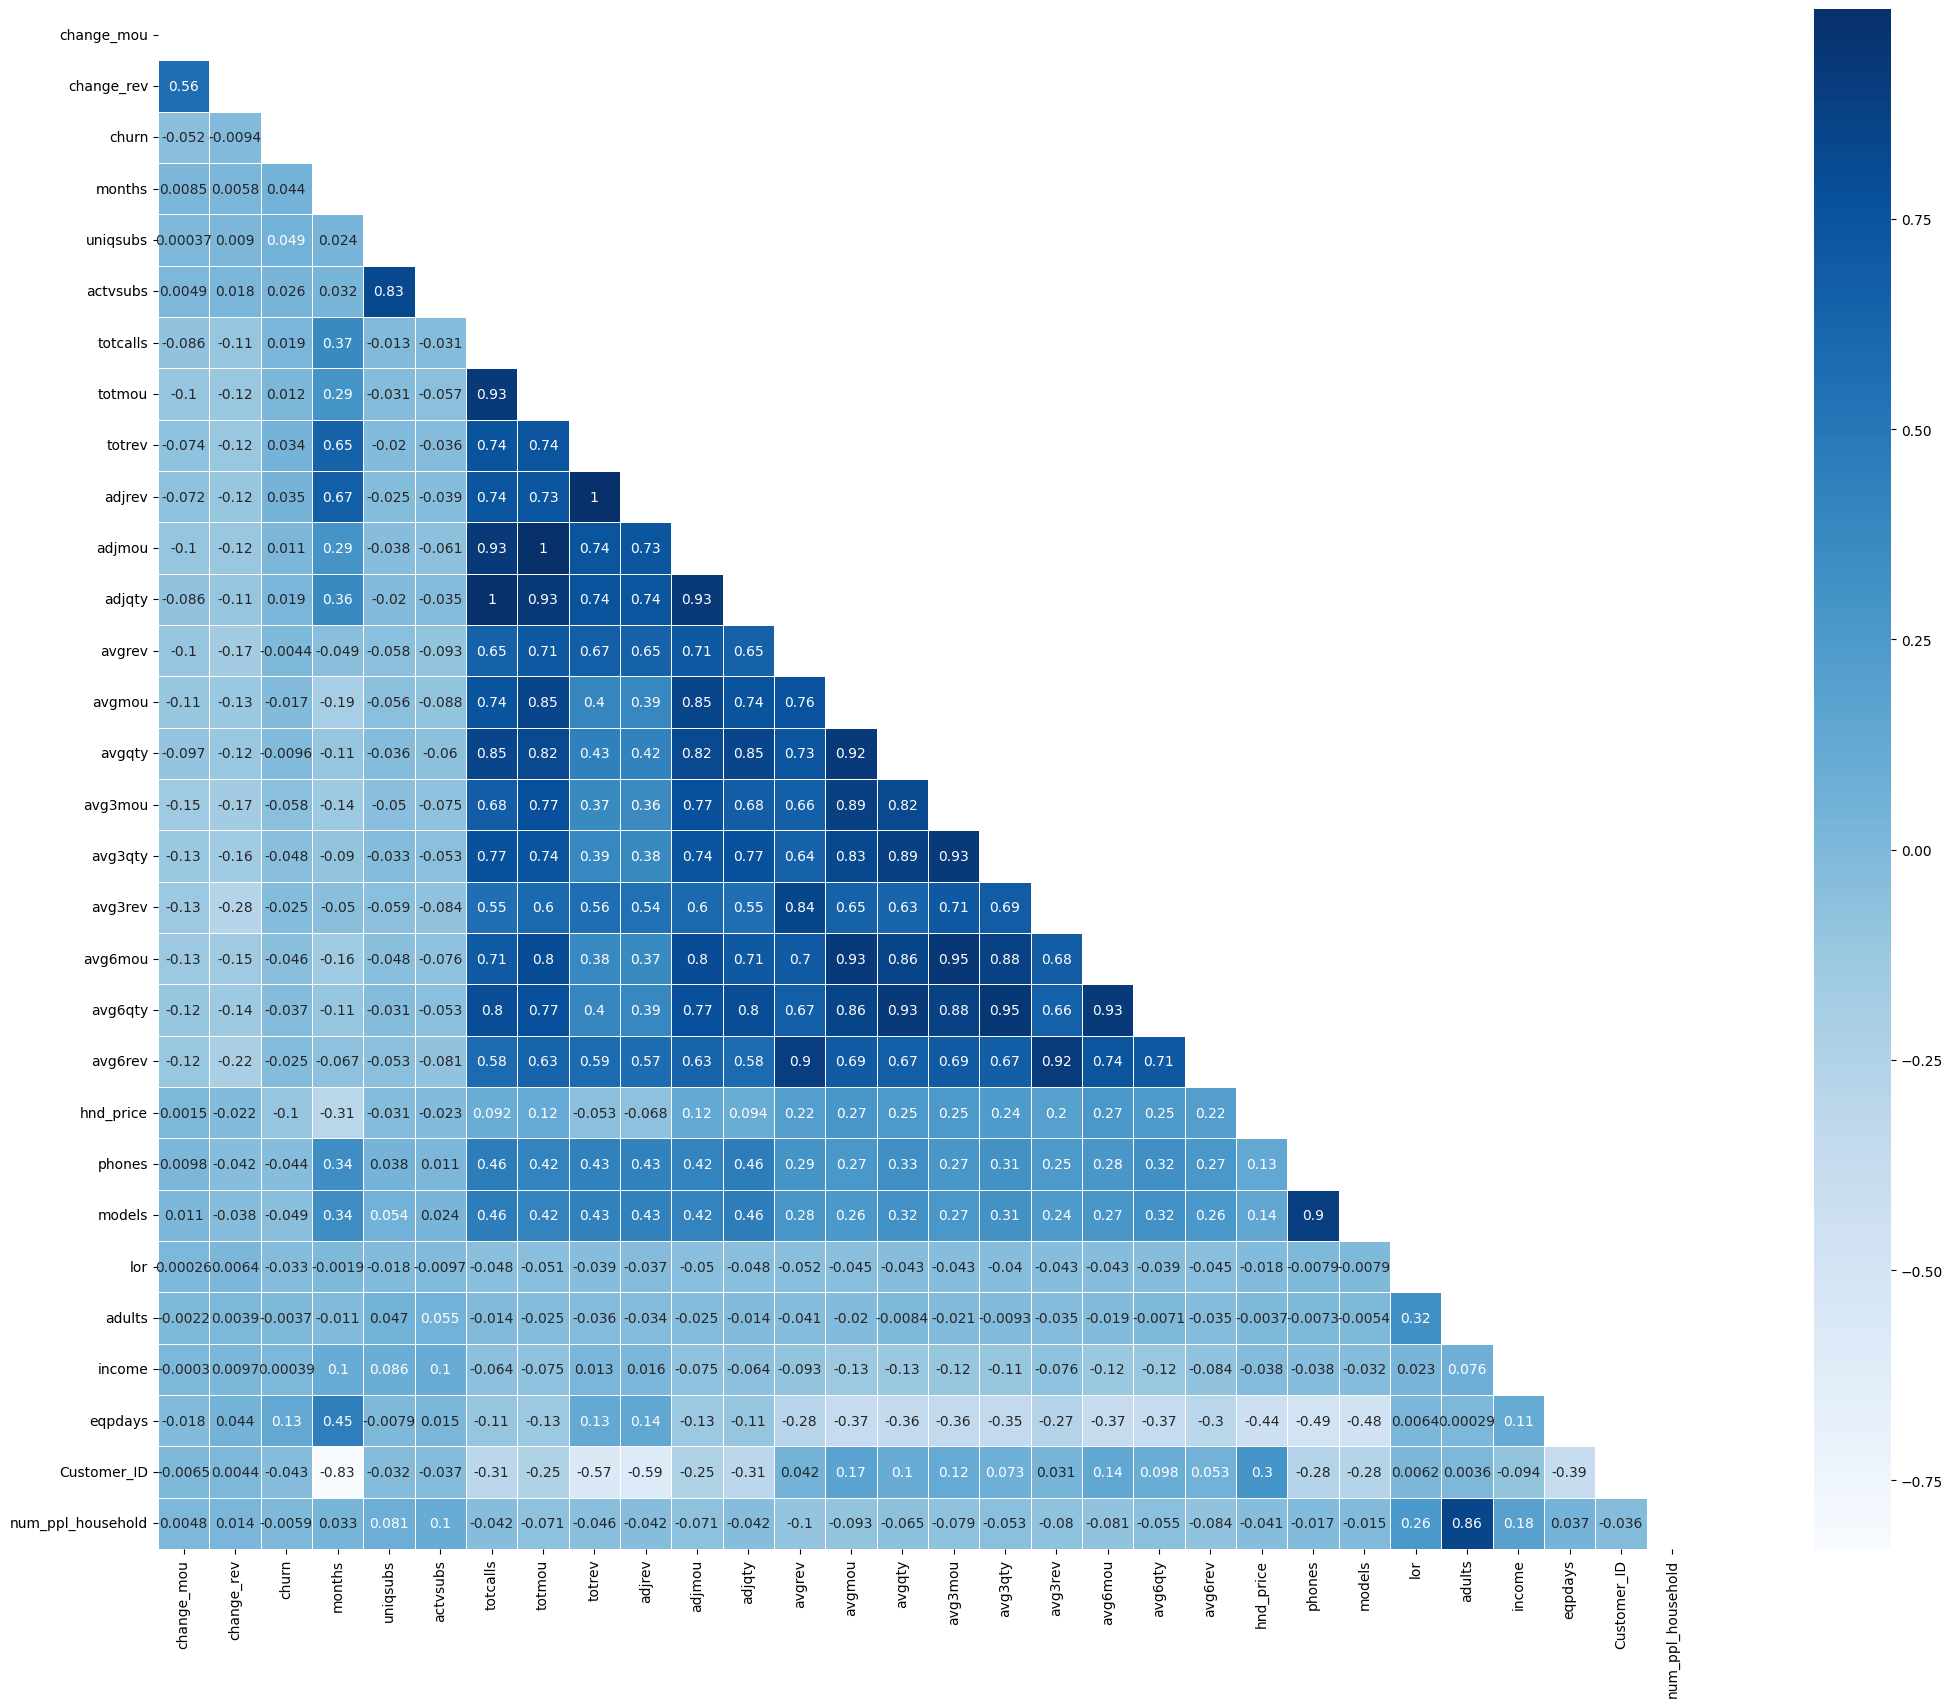

In [32]:
# heatmap for non-mean cols

non_mean_data = vis_df[heatmap2]
non_mean_data_spearman = non_mean_data.corr(method='spearman')

mask = np.zeros_like(non_mean_data_spearman, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30, 20))
sns.heatmap(data = non_mean_data_spearman, mask=mask, annot=True, cmap=plt.cm.Blues, square=True, linewidths=0.5)
plt.show()

In [3]:
# drop redundant cols based off correlations

output_df = vis_df.drop(columns=['ovrrev_Mean',
                                 'cc_mou_Mean',
                                 'mou_opkd_Mean',
                                 'attempt_Mean',
                                 'complete_Mean',
                                 'mou_cdat_Mean',
                                 'adjqty',
                                 'adjmou',
                                 'adjrev', 
                                 'vceovr_Mean',
                                 'comp_vce_Mean',
                                 'inonemin_Mean',
                                 'ccrndmou_Mean',
                                 ])

In [28]:
output_df.to_csv('../data/processed/modeling_data.csv', index=False)